# COMP3670/6670 Week 5: Clustering 

In this tutorial, we'll be covering two main clustering algorithms: agglomerative hierarchical clustering & k-means clustering. We'll do this by implementing both algorithms, and using them to cluster some toy datasets.

### Before you start, you should understand:
* Goals of unsupervised learning
* Programming with numpy & matplotlib

If you are not comfortable with any of these topics, you should discuss with your tutors now.

### After this lab, you should be comfortable with the: 
* goals of clustering
* K-means clustering algorithm
* agglomerative clustering algorithm
* differences and tradeoffs between both algorithms

In [1]:
# Set-up code
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Jupyter magic for inline figures
%matplotlib inline 

mpl.rcParams['image.cmap'] = 'Accent' # Changing the default colour-scheme for readability

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## What is clustering?

Clustering is a form of *unsupervised learning* where we aim to group our data into disjoint sets of similar elements called "clusters". In this lab, we will explore two algorithms for solving this problem: k-means clustering and agglomerative clustering.

We'll start out by generating a dataset to perform clustering on. Sklearn has a handy function called `make_blobs` which draws datapoints from several Gaussian distributions to form a dataset with multiple different "groups" of data. Our goal will be to use clustering techniques to figure out which Gaussian each datapoint was drawn from. We can then use the `labels` return value of `make_blobs` as our ground truth to compare our results against. 

**Exercise:**
Complete the `plot_2d_clusters` function below. It should take the 2-d data and labels generated from `make_blobs` and generate a scatterplot with each label given a unique colour. 
*Hint:* use the `c` parameter of `plt.scatter`.

In [23]:
def plot_2d_clusters(data, labels):
    """Plot a set of 2-d datapoints (data) with colours according to the label."""
    colours = labels
    plt.scatter(data[:, 0], data[:, 1], c = labels)
      # Remove this to run the code!

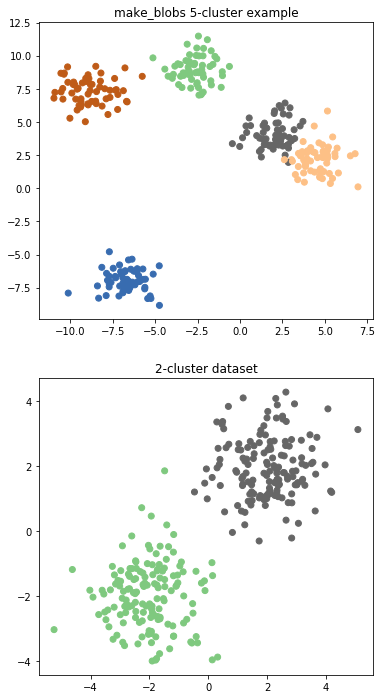

In [24]:
# Clustering Visualisation Test Code

from sklearn.datasets import make_blobs # Function for generating Gaussian clusters

centers = 5 # Number of clusters.
n_samples = 300 # Number of datapoints to generate

random_state = 42 # Random seed
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

plt.figure(figsize=(6, 12))

plt.subplot(211)
plt.title("make_blobs 5-cluster example")
plot_2d_clusters(data, labels)

# Generate the dataset we'll use for the rest of this lab.
centers = [(-2, -2), (2, 2)] # We can also specify centroid coordinates
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

plt.subplot(212)
plt.title("2-cluster dataset")
plot_2d_clusters(data, labels)

plt.plot()
None # Don't display output

## Agglomerative Clustering ##

The first clustering algorithm we'll discuss is **agglomerative clustering**. This algorithm is part of a family of algorithms called **Hierarchical clustering**, where we seek to build up a hierarchy of clusters, based on how similar points are to each other.
These algorithms fall into two categories: **agglomerative**, where each data point is assigned it's own
cluster, and then similar clusters are then merged together, or **divisive**,
where all the data points are grouped together in a single cluster, and split into
smaller clusters recursively. 

For this lab, we'll focus on a specific type of agglomerative clustering called **centroid linkage clustering**, described below.

Let $\mathcal{C}$ be a set of clusters, each cluster being a set of datapoints.
For every cluster $C \in \mathcal{C}$, we can compute the centroid ${\mu}_C$ as the representative of that cluster:
$$
{\mu}_C := \frac{1}{|C|} \sum_{x \in C} x
$$
Now for any two clusters we define the distance between two clusters as the
distance between the centroids of each cluster:
$$
d(C,D) := ||{\mu}_C - {\mu}_D||_2
$$

Note that in practise we don't need to recompute the centroid each time if the cluser is unchanged. Instead, we can store the centroid with the cluster for efficiency purposes.

The agglomerative clustering algorithm thus is the following:

1. **Initalise:** Set $\mathcal{C} = \{ \{\textbf{x}_1\} , \{\textbf{x}_2\}, \ldots, \{\textbf{x}_n\} \}$ (assign each point it's own cluster.),
    and for all $C \in \mathcal{C},$ set $\mu_C$ to be the single point $\textbf{x}_i$ in that cluster. 
    
2. **Merge:** Find the clusters $C$ and $D$ such that $||\mu_C - \mu_D||_2$ 
    is minimized. That is, find the clusters that are closest to each other.
    
3. **Update:**
    Remove both $C$ and $D$ from $\mathcal{C}$, and add $C \cup D$ to 
    $\mathcal{C}$. Set 
    $$
    \mu_{C \cup D} = \frac{1}{|C \cup D|} \sum_{\textbf{x} \in C \cup D} \textbf{x}
    $$
    If the number of clusters $|\mathcal{C}|$ is now equal to $K$, terminate. 
    Else, goto **Merge**.
    
    
**Exercise:** Implement `agglomerative_clustering` below for 2-dimensional data, assuming k=2 (2 clusters).

In [25]:
def agglomerative_clustering(data):
    """Cluster a dataset using the agglomerative clustering algorithm.
    
    Note that you need to return an array of integers (either 0 or 1) for each datapoint representing which
    of the two clusters they belong to. Remember that labels are arbritrary (i.e. you can swap all 0s and 1s)."""
    num = data.shape[0]
    l1 = 0
    for i in range(data.shape(0)):
        for j in range(i, data.shape(0)):
            l2 = np.vdot(data[i, :], data[j, :])
            if (l2 >= l1){
                l1 = l2
                data = np.delete[A, i]
                num--
            }
            if( num ==2 )
            
    raise NotImplementedError # Remove this to run the code!



In [26]:
# Agglomerative Clustering Test Code
pred_labels = agglomerative_clustering(data)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("Agglomerative Clustering Predicted Labels")
plot_2d_clusters(data, pred_labels)

plt.subplot(122)
plt.title("True Labels")
plot_2d_clusters(data, labels)


plt.plot()
None # Don't display output

NotImplementedError: 

## K-Means Clustering

The second clustering algorithm we focus on in this course is **K-Means clustering**. In comparison to the agglomerative clustering algorithm, K-Means clustering starts by making a random "guess" at the location of centroids, then iteratively optimises the loss function (defined below) until reaching a local minimum.  


For each point $\textbf{x}_n$, we introduce the binary indicator 
$r_{nk} \in \{0,1\}$, which indicates to which cluster $\textbf{x}_n$ belongs.

$$
r_{nk} = \begin{cases}
1 & \textbf{x}_n \text{ is assigned to cluster }k \\
0 & \text{otherwise} \end{cases}	
$$

We introduce a collection of vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$,
where $\boldsymbol{\mu}_k$ is a vector that represents cluster $k$.

The loss function (which measures the squared distance of 
how far each data point $\boldsymbol{x}_n$ is away from the 
representative vector $\boldsymbol{\mu}_k$ of its cluster) is given by

$$
L = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\textbf{x}_n - \boldsymbol{\mu}_k||_2^2
$$

We define the K-means algorithm as follows:

<ol>
    <li>
        $\textbf{Initalise:}$ Choose initial values for 
        the vectors $\{ \boldsymbol{\mu}_1, \ldots \boldsymbol{\mu}_K \}$.
    </li>
    <li>
        $\textbf{Expectation:}$ Update the cluster assignments such that each data point
        $\textbf{x}_n$ is assigned to the cluster with closest representative $\boldsymbol{\mu}_k$.
        $$
        r_{nk} := \begin{cases}
        1 & k = \text{argmin}_j ||\textbf{x}_n - \boldsymbol{\mu}_j||_2^2 \\
        0 & \text{otherwise}
        \end{cases}
        $$
    </li>
    <li>
        $\textbf{Maximisation:}$ Update the representatives $\boldsymbol{\mu}_k$ to be the average
        of all data points currently assigned to cluster $k$
        $$
        \boldsymbol{\mu}_k := \frac{\sum_{n} r_{nk} \textbf{x}_n}{\sum_n r_{nk}}  
        = \frac{\text{sum of all data points assigned to $k$}}
        {\text{number of data points assigned to $k$}}
        $$
    </li>
    <li>
        Repeat steps 2 and 3 until there are no further changes in the assignments of
        $r_{nk}$ or $\boldsymbol{\mu}_k$.
    </li>
</ol>


**Exercise:** Implement the `k_means_clustering` function to cluster 2-dimensional data, assuming k=2.

In [ ]:
def k_means_clustering(data):
    """Cluster a dataset using the K-means clustering algorithm.
    
    Note that you need to return an array of integers (either 0 or 1) for each datapoint representing which
    of the two clusters they belong to. Remember that labels are arbritrary (i.e. you can swap all 0s and 1s)."""
    
    raise NotImplementedError # Remove this to run the code!

In [ ]:
# K-Means Test Code

pred_labels = k_means_clustering(data)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title("K-Means Clustering Predicted Labels")
plot_2d_clusters(data, pred_labels)

plt.subplot(122)
plt.title("True Labels")
plot_2d_clusters(data, labels)


plt.plot()
None # Don't display output

## Agglomerative vs K-Means Clustering

We've now seen two approaches to doing clustering. As you should see from the tests, the two algorithms behave approximately the same with clusters that are far enough appart. We'll compare them on a much trickier dataset: two clusters with a large amount of overlap. We'll use four metrics for this comparison:

1. Visual Inspection
2. Accuracy
3. Loss
4. Runtime

The code necessary for visual inspection and runtime analysis is provided for you below.

**Exercise:** Implement the `accuracy` and `loss` functions below. `Accuracy` is defined as $\frac{\textrm{# of correct predictions}}{\textrm{# of predictions}}$, and `loss` is defined as the loss function for k-means clustering (above).

In [ ]:
def accuracy(pred_labels, true_labels):
    """Compute the accuracy of the predicated labels vs the true labels.
    
    Remember that the labels may be inverted (i.e. the original 0s may now be the 1s).
    You should use whichever set of labellings have the best accuracy. """
    
    raise NotImplementedError # Remove this to run the code!
    
def loss(data, labels):
    """Compute the loss of the dataset according to the predicted labels.
    
    Hint: it may be useful to use a helper function to compute the loss for each centroid."""
    
    raise NotImplementedError # Remove this to run the code!
    

In [ ]:
from time import process_time

# Clustering Comparison Test Code
centers = [(2, 2), (4,4)]
data, labels = make_blobs(centers=centers, n_samples=n_samples, random_state=random_state)

before_time = process_time()
agglomerative_labels = agglomerative_clustering(data)
duration = process_time() - before_time
print(f"Agglomerative Clustering Runtime: {duration * 1000:.1f}ms")

before_time = process_time()
k_means_labels = k_means_clustering(data)
duration = process_time() - before_time
print(f"K-Means Clustering Runtime: {duration * 1000:.1f}ms")
print()

#Print statistics
print(f"Agglomerative Clustering Accuracy: {accuracy(agglomerative_labels, labels) * 100:.2f}%")
print(f"K-Means Clustering Accuracy: {accuracy(k_means_labels, labels) * 100:.2f}%")
print()
print(f"Average Loss (True): {loss(data, labels)/n_samples:.2f}")
print(f"Average Loss (Agglomerative): {loss(data, agglomerative_labels)/n_samples:.2f}")
print(f"Average Loss (K_Means): {loss(data, k_means_labels)/n_samples:.2f}")

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.title("Agglomerative Clustering Predicted Labels")
plot_2d_clusters(data, agglomerative_labels)

plt.subplot(132)
plt.title("True Labels")
plot_2d_clusters(data, labels)

plt.subplot(133)
plt.title("K-Means Clustering Predicted Labels")
plot_2d_clusters(data, k_means_labels)

plt.plot()
None # Don't display output

**Exercise:** What do you notice in terms of the performances of k-means clustering vs agglomerative clustering? Discuss the results with your neighbours, and try to explain why each observation may occur:

* Runtime: 
* Accuracy & Loss:
* Visual Observations:

**Exercise:** Is it possible to have less than 50% accuracy with 2 clusters? What is the minimum possible accuracy for a clustering with k-clusters?

Answer: 

**Exercise:** You should notice that the average loss for K_Means is less than the average loss for the true labels. Does this make sense? What causes it?

Answer: 